In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import seaborn as sns

In [10]:
df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/anscombe.csv')

In [11]:
df.head()

,category,x,y
0,a,10,8.04
1,a,8,6.95
2,a,13,7.58
3,a,9,8.81
4,a,11,8.33


In [23]:
df.describe()

,x,y
count,44.000000,44.000000
mean,9.000000,7.500682
std,3.198837,1.958925
min,4.000000,3.100000
25%,7.000000,6.117500
50%,8.000000,7.520000
75%,11.000000,8.747500
max,19.000000,12.740000


In [16]:
df.groupby('category').describe()

x                                               y            \
         count mean       std  min  25%  50%   75%   max count      mean   
category                                                                   
a         11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
b         11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
c         11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
d         11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                    
               std   min    25%   50%   75%    max  
category                                            
a         2.031568  4.26  6.315  7.58  8.57  10.84  
b         2.031657  3.10  6.695  8.14  8.95   9.26  
c         2.030424  5.39  6.250  7.11  7.98  12.74  
d         2.030579  5.25  6.170  7.04  8.19  12.50

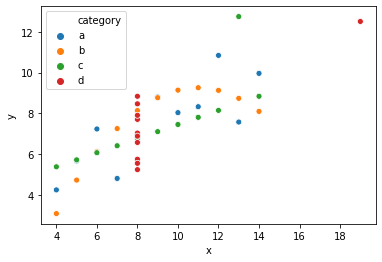

In [24]:
# help(sns.scatterplot)
sns.scatterplot('x', 'y', hue='category', data = df)

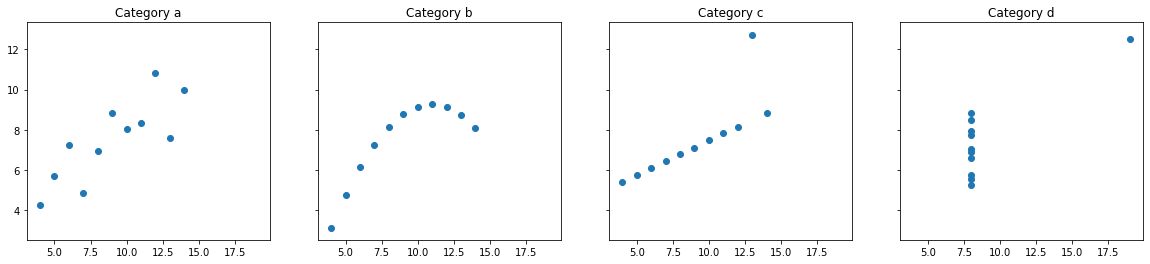

In [25]:
fig, ax = plt.subplots(1, 4, figsize=(20, 4), sharex=True, sharey=True)
for i, cat in enumerate(df['category'].unique()):
    ax[i].scatter(df.loc[df['category'] == cat, 'x'], df.loc[df['category'] == cat, 'y'])
    ax[i].set_title('Category {}'.format(cat))

plt.show()

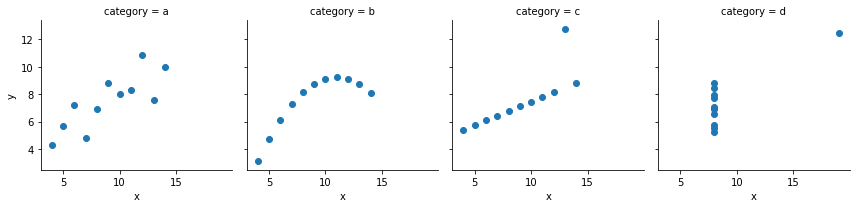

In [26]:
g = sns.FacetGrid(df, col='category')
g.map(plt.scatter, 'x', 'y')

In [27]:
# This dataset is called Anscome's Quartet

# PART TWO

In [28]:
df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/physician-visits.csv')

In [29]:
df.head()

,Unnamed: 0,ofp,ofnp,opp,opnp,emr,hosp,numchron,adldiff,age,black,sex,maried,school,faminc,employed,privins,medicaid,region,hlth
0,1,5,0,0,0,0,1,2,0,6.9,yes,male,yes,6,2.8810,yes,yes,no,other,other
1,2,1,0,2,0,2,0,2,0,7.4,no,female,yes,10,2.7478,no,yes,no,other,other
2,3,13,0,0,0,3,3,4,1,6.6,yes,female,no,10,0.6532,no,no,yes,other,poor
3,4,16,0,5,0,1,1,2,1,7.6,no,male,yes,3,0.6588,no,yes,no,other,poor
4,5,3,0,0,0,0,0,2,1,7.9,no,female,yes,6,0.6588,no,yes,no,other,other


In [30]:
# describe numerical info
df.describe()

,Unnamed: 0,ofp,ofnp,opp,opnp,emr,hosp,numchron,adldiff,age,school,faminc
count,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000
mean,2203.500000,5.774399,1.618021,0.750794,0.536087,0.263504,0.295960,1.541988,0.204040,7.402406,10.290286,2.527132
std,1272.046972,6.759225,5.317056,3.652759,3.879506,0.703659,0.746398,1.349632,0.403044,0.633405,3.738736,2.924648
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.600000,0.000000,-1.012500
25%,1102.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,6.900000,8.000000,0.912150
50%,2203.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,7.300000,11.000000,1.698150
75%,3304.750000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,7.800000,12.000000,3.172850
max,4406.000000,89.000000,104.000000,141.000000,155.000000,12.000000,8.000000,8.000000,1.000000,10.900000,18.000000,54.835100


In [32]:
# describe categorical info
df.describe(include='O')

,black,sex,maried,employed,privins,medicaid,region,hlth
count,4406,4406,4406,4406,4406,4406,4406,4406
unique,2,2,2,2,2,2,4,3
top,no,female,yes,no,yes,no,other,other
freq,3890,2628,2406,3951,3421,4004,1614,3509


In [33]:
df['hlth'].value_counts()

other        3509
poor          554
excellent     343
Name: hlth, dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4406 entries, 0 to 4405
Data columns (total 20 columns):
Unnamed: 0    4406 non-null int64
ofp           4406 non-null int64
ofnp          4406 non-null int64
opp           4406 non-null int64
opnp          4406 non-null int64
emr           4406 non-null int64
hosp          4406 non-null int64
numchron      4406 non-null int64
adldiff       4406 non-null int64
age           4406 non-null float64
black         4406 non-null object
sex           4406 non-null object
maried        4406 non-null object
school        4406 non-null int64
faminc        4406 non-null float64
employed      4406 non-null object
privins       4406 non-null object
medicaid      4406 non-null object
region        4406 non-null object
hlth          4406 non-null object
dtypes: float64(2), int64(10), object(8)
memory usage: 688.6+ KB
